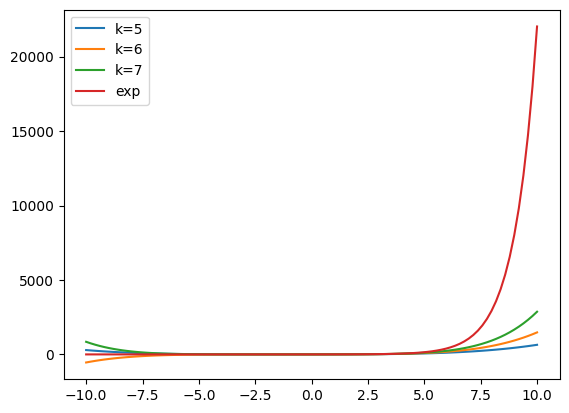

In [2]:
from math import exp, factorial
import matplotlib.pyplot as plt
import numpy as np



def teylor(x, k):
    result = 0
    for i in range(0, k):
        result += ((x ** i) / factorial(i))
    return result


x = np.linspace(-10, 10, 100)
plt.plot(x, teylor(x, 5), label="k=5")
plt.plot(x, teylor(x, 6), label="k=6")
plt.plot(x, teylor(x, 7), label="k=7")
plt.plot(x, np.exp(x), label="exp")
plt.legend()
plt.show()


In [3]:
from numpy import sqrt
from scipy import integrate


def func(x,y,z):
    return (x+y+z)/(sqrt(2*x**2+4*y**2+5*z**2))
def x_bounds():
    return [0,1]
def y_bounds(x):
    return [0,sqrt(1-x**2)]
def z_bounds(x,y):
    return [0,sqrt(1-x**2-y**2)]

integrate.nquad(func,[z_bounds,y_bounds,x_bounds])

(0.41781536381022977, 1.4868929282160128e-08)

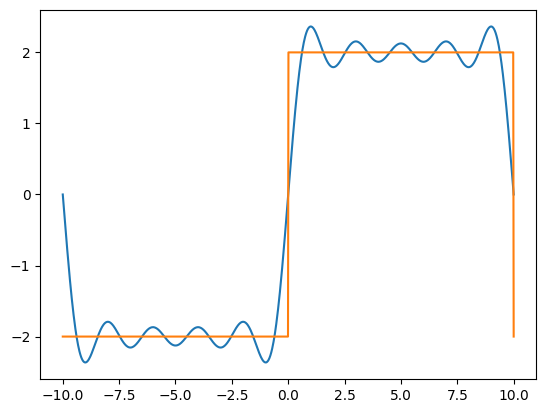

In [4]:
import scipy
from numpy import cos, sin, sign
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


def a_0(T, t, x, A):
    return 2/T*quad(lambda t: x(t, A,T), t, t+T)[0]


def a_n(t, T, n, x, A):
    return 2/T*quad(lambda t: x(t, A,T) * cos(n * 2 * np.pi / T * t), t, t+T)[0]


def b_n(t, T, n, x, A):
    return 2/T*quad(lambda t: x(t, A,T) * sin(n * 2 * np.pi / T * t), t, t+T)[0]


def furie(N, t_0, T, function_x, num_t, mas_t, A):
    """
    :param N: Length of the sum of the series
    :param t_0: Initial moment of time
    :param T: Period
    :param function_x: Function for approximation
    :param num_t: Number of t
    :param mas_t: massive of t
    :param A: Amplitude
    :return: List of dots
    """
    a = []
    w = 2 * np.pi / T
    for t in range(num_t):
        result = 0
        for n in range(1, N):
            result += (a_n(t_0, T, n, function_x, A) * cos(n * w * mas_t[t]) + b_n(t_0, T, n, function_x, A) *
                       sin(n * w * mas_t[t]))
        a.append((a_0(T, t_0, function_x, A))/2 + result)
    return a


def square_signal(t, A, T):
    return A * scipy.signal.square(2 * np.pi / T * t)

tmin = -10
tmax = 10
num_t = 1000
amplitude = 2
T = 20
N_dots = 10
x = np.linspace(tmin, tmax, num_t)
approx_signal = furie(N_dots, tmin, T, square_signal, num_t, x, amplitude)
origin_signal = square_signal(x, amplitude,T)
plt.plot(x, approx_signal)
plt.plot(x, origin_signal)
plt.show()


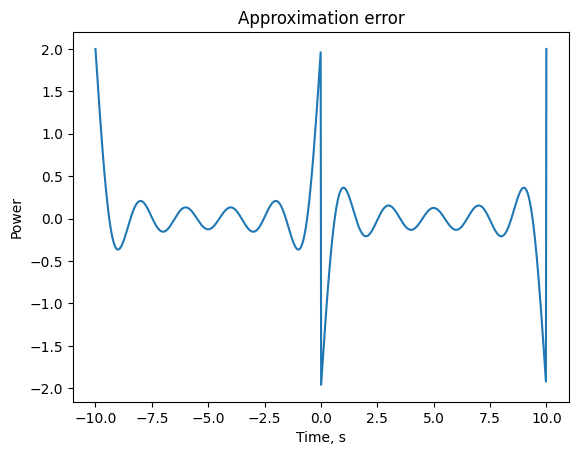

In [5]:
plt.title("Approximation error")
plt.xlabel('Time, s')
plt.ylabel('Power')
plt.plot(x, approx_signal-origin_signal)

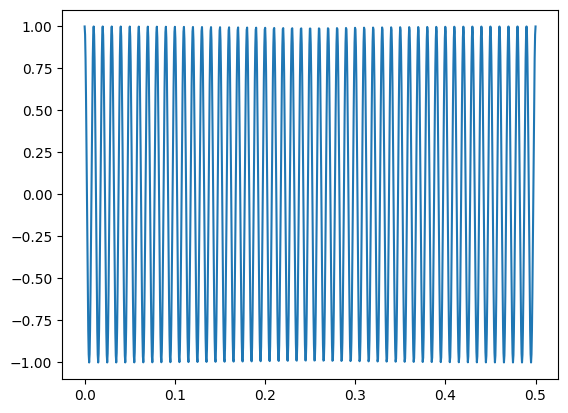

In [6]:
def cos_signal(t, A, T):
    return A*np.cos(2 * np.pi / T*t)

tmin = 0
tmax = 0.5
N=10
time_lst = np.linspace(tmin, tmax, 1000)

frequency = 100
appr_sign_y = furie(N,tmin,1/frequency,cos_signal,1000,time_lst,1)
#plt.xlim(tmin, tmax/10)
plt.plot(time_lst, appr_sign_y)

In [7]:
yff = np.fft.rfft(appr_sign_y)
xf = np.fft.rfftfreq(len(time_lst),d=time_lst[1]-time_lst[0])

1.0

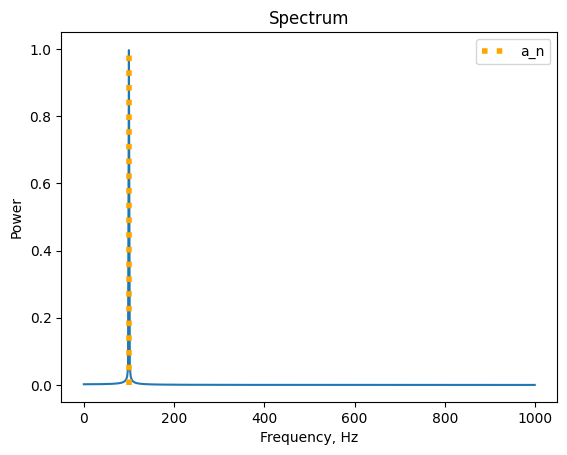

In [8]:
plt.title("Spectrum")
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')

plt.plot(xf, np.abs(yff)*2/1000)
plt.vlines(frequency, 0, a_n(t=tmin,T=T,n=1,x=cos_signal,A=1), linestyle='dotted',linewidth=4,colors="orange",label="a_n")
plt.legend()
a_n(t=tmin,T=T,n=1,x=cos_signal,A=1)

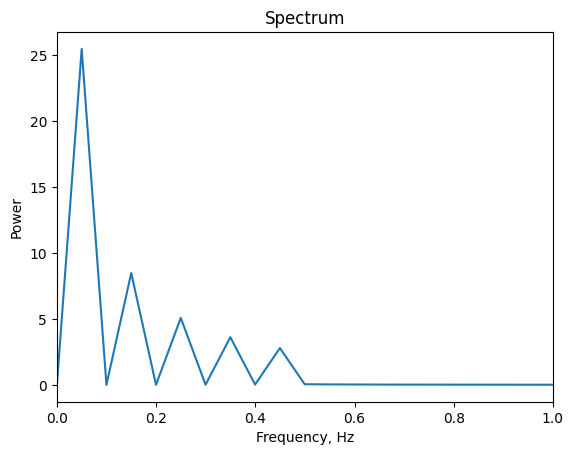

In [9]:
y_ff = np.fft.rfft(approx_signal)
x_f = np.fft.rfftfreq(len(x),d=x[1]-x[0])
plt.plot(x_f, np.abs(y_ff)*2/100)
plt.xlim(0,1)
plt.title("Spectrum")
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')
plt.show()

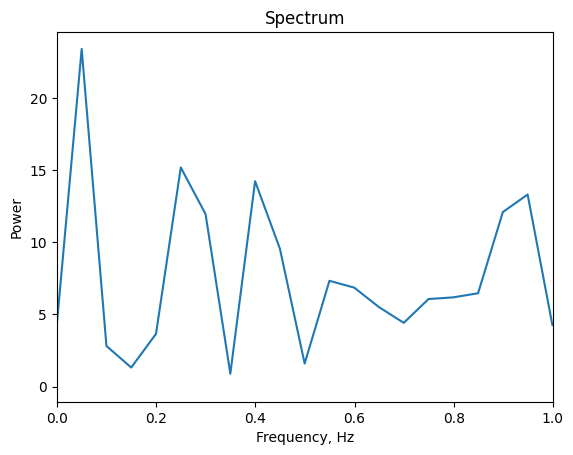

In [10]:
noise_signal = np.array(approx_signal) + np.random.normal(0,10,len(approx_signal))
y_ff_noise = np.fft.rfft(noise_signal)
x_f_noise = np.fft.rfftfreq(len(x),d=x[1]-x[0])
plt.plot(x_f, np.abs(y_ff_noise)*2/100)
plt.xlim(0,1)
plt.title("Spectrum")
plt.xlabel('Frequency, Hz')
plt.ylabel('Power')
plt.show()